In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from bokeh.plotting import figure, output_file, show
#import matplotlib.pyplot as plt
from matplotlib import cm, pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df=pd.read_csv('Rest_rev_pred_train.csv')

In [3]:
df.shape

(137, 43)

In [4]:
data=df

In [5]:
data.shape

(137, 43)

In [6]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [7]:
data.rename(columns={'Open Date': 'Opendate', 'City Group': 'CityGroup'}, inplace=True)

In [8]:
"""
Before Performing Label Encoding, we need to convert the data type of these columns from Object to Category then after performing
Label Encoding techniques to assign values like 0,1,2,3,4...and so on.
"""
data["City"] = data["City"].astype('category')
data["CityGroup"] = data["CityGroup"].astype('category')
data["Type"] = data["Type"].astype('category')

data.dtypes

Id              int64
Opendate       object
City         category
CityGroup    category
Type         category
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

In [9]:
# Convert date to days
# Have to drop date 
import time
from datetime import datetime as dt
# train
all_diff = []
for date in data["Opendate"]:
    diff = dt.now() - dt.strptime(date, "%m/%d/%Y")
    all_diff.append(int(diff.days/1000))

data['Days_open'] = pd.Series(all_diff)
print(data.head())

   Id    Opendate        City   CityGroup Type  P1   P2   P3   P4  P5  ...  \
0   0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P30  P31  P32  P33  P34  P35  P36  P37    revenue  Days_open  
0    5    3    4    5    5    4    3    4  5653753.0          7  
1    0    0    0    0    0    0    0    0  6923131.0          4  
2    0    0    0    0    0    0    0    0  2055379.0          2  
3   25   12   10    6   18   12   12    6  2675511.0          2  
4    5    1    3    2    3    4    3    3  4316715.0          3  

[5 rows x 44 columns]


In [10]:
#Drop Open Date Column
data = data.drop('Opendate', 1)

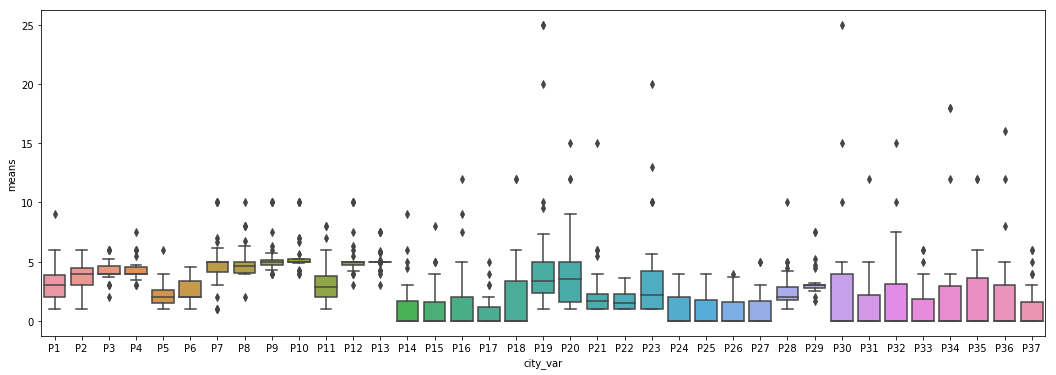

In [11]:
# Plotting mean of P-variables over each city helps us see which P-variables are highly related to City
# since we are given that one class of P-variables is geographical attributes.
distinct_cities = df.loc[:, "City"].unique()

# Get the mean of each p-variable for each city
means = []
for col in df.columns[5:42]:
    temp = []
    for city in distinct_cities:
        temp.append(df.loc[df.City == city, col].mean())     
    means.append(temp)
    
# Construct data frame for plotting
city_pvars = pd.DataFrame(columns=["city_var", "means"])
for i in range(37):
    for j in range(len(distinct_cities)):
        city_pvars.loc[i+37*j] = ["P"+str(i+1), means[i][j]]
        
# Plot boxplot
plt.rcParams['figure.figsize'] = (18.0, 6.0)
sns.boxplot(x="city_var", y="means", data=city_pvars)

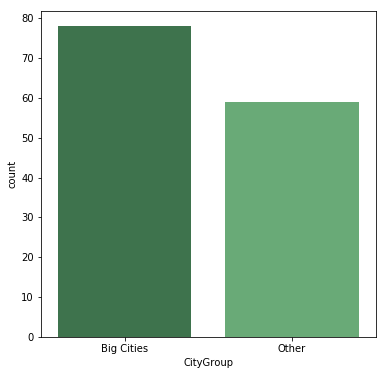

In [12]:
# The two categories of City Group both appear very frequently
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sns.countplot(x='CityGroup', data=data, palette="Greens_d")

In [13]:
# One hot encode City Group
data = data.join(pd.get_dummies(data['CityGroup'], prefix="CG"))

data.dtypes

Id                  int64
City             category
CityGroup        category
Type             category
P1                  int64
P2                float64
P3                float64
P4                float64
P5                  int64
P6                  int64
P7                  int64
P8                  int64
P9                  int64
P10                 int64
P11                 int64
P12                 int64
P13               float64
P14                 int64
P15                 int64
P16                 int64
P17                 int64
P18                 int64
P19                 int64
P20                 int64
P21                 int64
P22                 int64
P23                 int64
P24                 int64
P25                 int64
P26               float64
P27               float64
P28               float64
P29               float64
P30                 int64
P31                 int64
P32                 int64
P33                 int64
P34                 int64
P35         

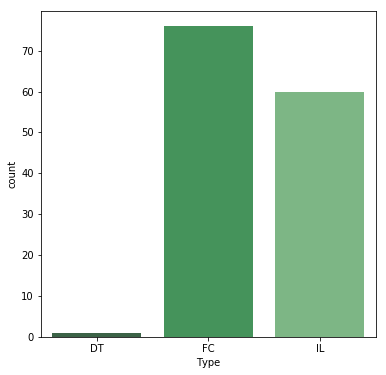

In [14]:
#Check the type column 
# One of the three Restaurant Types (DT), are extremely rare
sns.countplot(x='Type', data=data, palette="Greens_d")

In [15]:
# One hot encode Restaurant Type
data = data.join(pd.get_dummies(data['Type'], prefix="T"))
 
# Drop the original column
data = data.drop(["Type"], axis=1)
data = data.drop(["CityGroup"], axis=1)

In [16]:
data.dtypes

Id                  int64
City             category
P1                  int64
P2                float64
P3                float64
P4                float64
P5                  int64
P6                  int64
P7                  int64
P8                  int64
P9                  int64
P10                 int64
P11                 int64
P12                 int64
P13               float64
P14                 int64
P15                 int64
P16                 int64
P17                 int64
P18                 int64
P19                 int64
P20                 int64
P21                 int64
P22                 int64
P23                 int64
P24                 int64
P25                 int64
P26               float64
P27               float64
P28               float64
P29               float64
P30                 int64
P31                 int64
P32                 int64
P33                 int64
P34                 int64
P35                 int64
P36                 int64
P37         

In [17]:
data["City_category"] = data["City"].cat.codes
data.head()

,Id,City,P1,P2,P3,P4,P5,P6,P7,P8,...,P36,P37,revenue,Days_open,CG_Big Cities,CG_Other,T_DT,T_FC,T_IL,City_category
0,0,İstanbul,4,5.0,4.0,4.0,2,2,5,4,...,3,4,5653753.0,7,1,0,0,0,1,31
1,1,Ankara,4,5.0,4.0,4.0,1,2,5,5,...,0,0,6923131.0,4,1,0,0,1,0,3
2,2,Diyarbakır,2,4.0,2.0,5.0,2,3,5,5,...,0,0,2055379.0,2,0,1,0,0,1,10
3,3,Tokat,6,4.5,6.0,6.0,4,4,10,8,...,12,6,2675511.0,2,0,1,0,0,1,28
4,4,Gaziantep,3,4.0,3.0,4.0,2,2,5,5,...,3,3,4316715.0,3,0,1,0,0,1,14


In [18]:
# Drop the original column
data = data.drop(["City"], axis=1)

In [19]:
data.dtypes

Id                 int64
P1                 int64
P2               float64
P3               float64
P4               float64
P5                 int64
P6                 int64
P7                 int64
P8                 int64
P9                 int64
P10                int64
P11                int64
P12                int64
P13              float64
P14                int64
P15                int64
P16                int64
P17                int64
P18                int64
P19                int64
P20                int64
P21                int64
P22                int64
P23                int64
P24                int64
P25                int64
P26              float64
P27              float64
P28              float64
P29              float64
P30                int64
P31                int64
P32                int64
P33                int64
P34                int64
P35                int64
P36                int64
P37                int64
revenue          float64
Days_open          int64


In [20]:
#Count distinct values for each column in Data frame
data.apply(lambda x: len(x.unique()))

Id               137
P1                 8
P2                 8
P3                 8
P4                 6
P5                 7
P6                 8
P7                 6
P8                 8
P9                 4
P10                4
P11                8
P12                7
P13                5
P14               10
P15                8
P16                9
P17                9
P18                7
P19                9
P20                9
P21                8
P22                5
P23                9
P24                9
P25                8
P26               10
P27                9
P28                9
P29                7
P30                9
P31               10
P32               10
P33                6
P34                8
P35                8
P36                8
P37                8
revenue          137
Days_open          8
CG_Big Cities      2
CG_Other           2
T_DT               2
T_FC               2
T_IL               2
City_category     34
dtype: int64

In [21]:
#stats of the predictor variable (Revenue)
data.revenue.describe()

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64

skew is 2.793478695162504


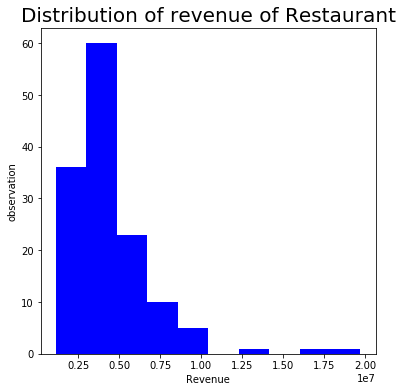

In [22]:
#analysing the distribution of Revenue
print('skew is', data.revenue.skew())   
plt.hist(data['revenue'], color= 'b')

plt.title('Distribution of revenue of Restaurant', fontsize = 20)
plt.ylabel('observation', fontsize = 10)
plt.xlabel('Revenue', fontsize = 10)

plt.show()

In [23]:
#log transforming sale price to transform it into gaussian distribution
target = np.log(data.revenue)

skew is 0.30740162838726504


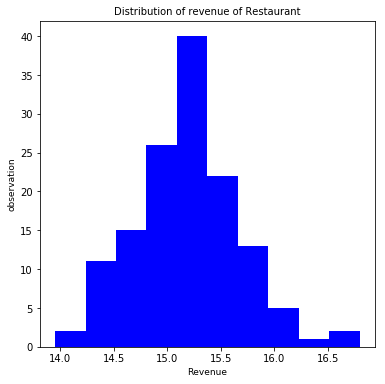

In [24]:
print('skew is', target.skew())
plt.hist(target, color= 'b')

plt.title('Distribution of revenue of Restaurant', fontsize = 10)
plt.ylabel('observation', fontsize = 9)
plt.xlabel('Revenue', fontsize = 9)

plt.show()

In [25]:
#features with the most correlation with the predictor variable
corr = data.corr()
print(corr['revenue'].sort_values(ascending = False)[:5], '\n')
print(corr['revenue'].sort_values(ascending = False)[-5:])

revenue          1.000000
Days_open        0.334930
City_category    0.266076
CG_Big Cities    0.237403
P2               0.191518
Name: revenue, dtype: float64 

P8         -0.084215
T_IL       -0.096696
P13        -0.105085
P29        -0.114846
CG_Other   -0.237403
Name: revenue, dtype: float64


In [26]:
#checking the null values
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending = False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls[:5]

,Null Count
Feature,
City_category,0
P11,0
P20,0
P19,0
P18,0


In [27]:
#Verifying missing values
sum(data.isnull().sum() != 0)

0

In [28]:
#log transforming the target variable to improve the linearity of the regression
y = np.log(data.revenue)
#dropping the target variable and the index from the training set
X = data.drop(['revenue', 'Id'], axis = 1)

In [29]:
# 1. THE overall function
# Generic all-in-one function to train an sklearn estimator and return the MSE and RMSE for both the training and test sets
#
def plot_and_compute_regression_metrics(name, estimator, X_train, y_train, X_test, y_test):
    # Train model
    estimator.fit(X_train, y_train)
    
    # Compute MSE and RSME for both training and test data
    train_predictions = estimator.predict(X_train)
    training_mse = mean_squared_error(train_predictions, y_train)
    training_rmse = np.sqrt(training_mse)
    #training_rSquared = estimator.score(y_train, train_predictions)
    
    test_predictions = estimator.predict(X_test)
    test_mse = mean_squared_error(test_predictions, y_test)
    test_rmse = np.sqrt(test_mse)
    #test_rSquared = estimator.score(y_test, test_predictions)
    
    # Plot predicted vs. actual values for both training and test data
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    ax1.set_title('{}: Training data\nRMSE: {}'.format(name, training_rmse))
    
    ax1.plot(X_train, y_train)
    ax1.scatter(y_train, train_predictions, color='green')
    ax1.set_xlabel("expected")
    ax1.set_ylabel("predicted")
    
    ax2.set_title('{}: Test data\nRMSE: {}'.format(name, test_rmse))
    ax2.plot(X_test, y_test)
    ax2.scatter(y_test, test_predictions, color='blue')
    ax2.set_xlabel("expected")
    ax2.set_ylabel("predicted")

    return training_mse, training_rmse, test_mse, test_rmse

In [30]:
from sklearn.pipeline import Pipeline

# Ipython display facilities
from IPython.display import HTML, display
import tabulate

# 2. Instantiate sklearn estimators

# Gradient boosting
gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth=1, loss='ls')
# SVR RBF
svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
# Linear regression
linear_reg = LinearRegression()
# Lasso regression
lasso = Lasso(alpha=0.1)
# Ridge regression
ridge = Ridge(alpha=.5)
# Elasticnet regression
elasticnet = ElasticNet()
# Bayesian ridge regression
bayesian_ridge = BayesianRidge()
# Polynomial regression (degree 3)
polynomial_degree3 = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
# Polynomial regression (degree 2)
polynomial_degree2 = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression())])

estimators = {
    "GradientBoostingRegressor": gbr,
    "SVRRBF": svr_rbf,
    "LinearRegression": linear_reg,
    "Lasso": lasso,
    "Ridge": ridge,
    "Elasticnet": elasticnet,
    "BayesianRidge": bayesian_ridge,
    "PolynomialRegression_degree_2": polynomial_degree2,
    "PolynomialRegression_degree_3": polynomial_degree3
}

In [31]:
# 3. Running the model with training and testing

# External loop to perform training and test k times. 
# Measure also exec time? not easy/precise in jupyter

# several files were run with 2, 5, 10, 15, 20. Standard is 10
input_num = input ("Enter a number: ")
k = int(input_num)
print ("The number you entered is: ", k)  

# 3. Running the model with training and testing

# External loop to perform training and test k times. 
# Measure also exec time? not easy/precise in jupyter

# several files were run with 2, 5, 10, 15, 20. Standard is 10
# def header of table out of loop.
metrics = [["Estimator", "MSETrain", "RMSETrain", "MSETest", "RMSETest"]]

# metr_df = pd.DataFrame(columns=["Estimator", "MSE - Training", "RMSE - Training", "MSE - Test", "RMSE - Test"])  

# first element, 0, is header
for i in range(0, k):           
    
    # makes sense to avid identical results by changing seed for each repetition of the lot (take k)
    # np.random.seed(None)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.RandomState(seed=None))  # shuffled but not stratified
     
    # Train, predict and compute metrics for each estimator
    for name, estimator in estimators.items():
        
        # tuple added as a list to the table
        trn_mse, trn_rmse, tst_mse, tst_rmse = plot_and_compute_regression_metrics(name, estimator, X_train, y_train, X_test, y_test)
      
        metrics.append([name, trn_mse, trn_rmse, tst_mse, tst_rmse ]) 
        
        plt.close('all') # all open figures.    


metr_df = pd.DataFrame(metrics[1:], columns=["Estimator", "MSETrain", "RMSETrain", "MSETest", "RMSETest"])  

  
print(i)
print(k)

Enter a number: 10
The number you entered is:  10
9
10


In [32]:
# just to check for repetitions
metr_df.head(18) 

,Estimator,MSETrain,RMSETrain,MSETest,RMSETest
0,GradientBoostingRegressor,1.285022e-01,3.584720e-01,0.172656,0.415519
1,SVRRBF,8.539140e-03,9.240747e-02,0.177086,0.420816
2,LinearRegression,1.072637e-01,3.275114e-01,1.022991,1.011430
3,Lasso,1.797497e-01,4.239689e-01,0.198597,0.445643
4,Ridge,1.079135e-01,3.285019e-01,0.855305,0.924827
5,Elasticnet,2.226518e-01,4.718599e-01,0.200714,0.448012
6,BayesianRidge,1.955826e-01,4.422472e-01,0.194518,0.441042
7,PolynomialRegression_degree_2,3.716780e-29,6.096540e-15,1.828133,1.352085
8,PolynomialRegression_degree_3,6.404587e-27,8.002867e-14,11.209019,3.347987
9,GradientBoostingRegressor,1.165028e-01,3.413251e-01,0.212301,0.460762


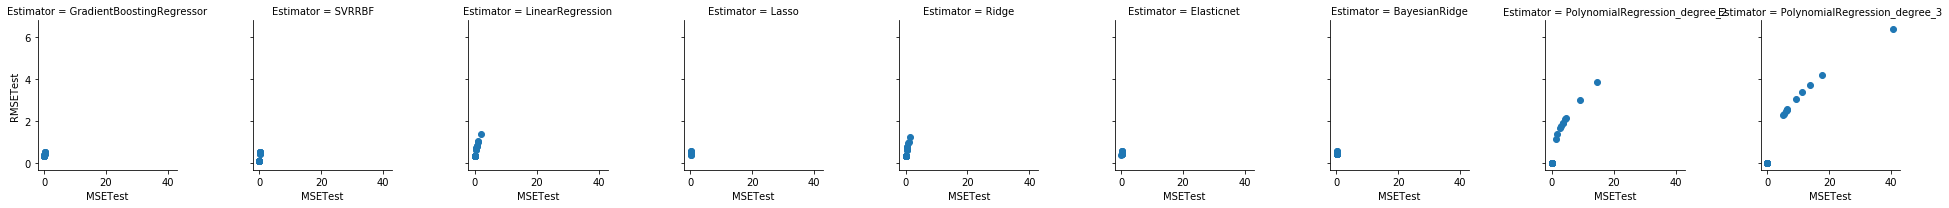

<Figure size 432x432 with 0 Axes>

In [34]:
# Create a FacetGrid varying by column and columns ordered with the Revenue variable
g = sns.FacetGrid(metr_df, col="Estimator")

# Map a scatter plot of Undergrad Population compared to RMSE
g.map(plt.scatter, 'MSETrain', 'RMSETrain')
g.map(plt.scatter, 'MSETest', 'RMSETest')

plt.show()
plt.clf()

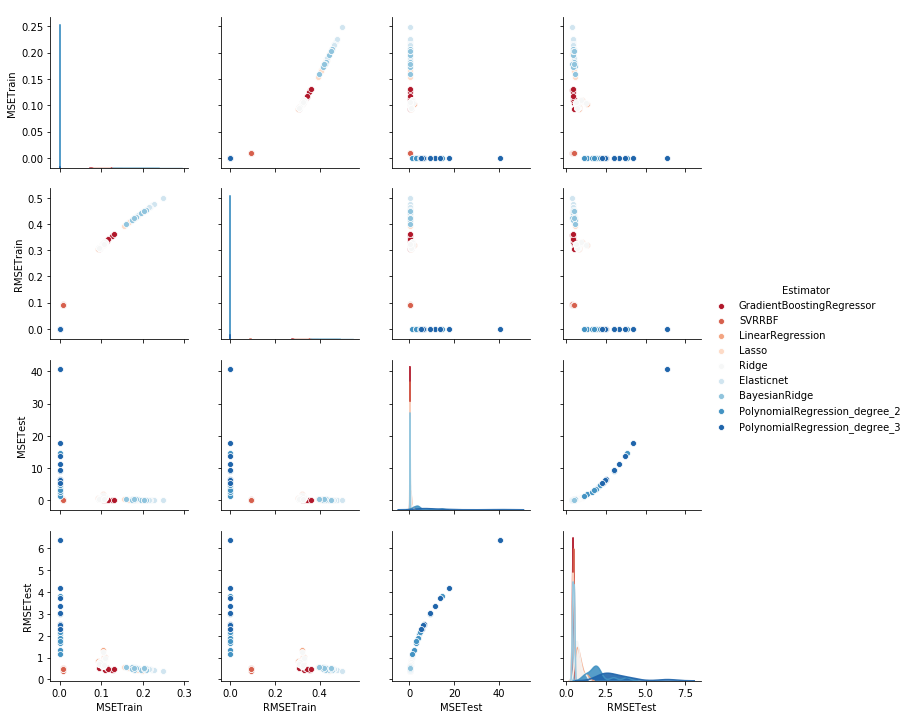

<Figure size 432x432 with 0 Axes>

In [35]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=metr_df,
        vars=["MSETrain", "RMSETrain", "MSETest", "RMSETest"],
        kind='scatter',
        hue='Estimator',     
        palette='RdBu',
        diag_kws={'alpha':.9})

plt.show()
plt.clf()

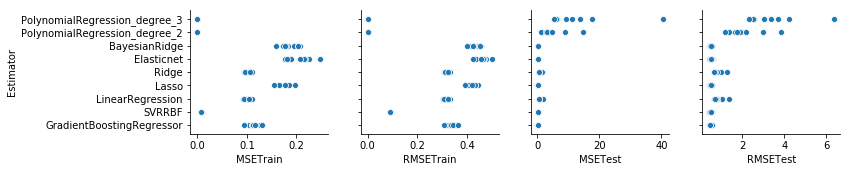

<Figure size 432x432 with 0 Axes>

In [36]:
# Build a pairplot with different x and y variables
sns.pairplot(data=metr_df,
        x_vars=["MSETrain", "RMSETrain", "MSETest", "RMSETest"],
        y_vars=['Estimator'],
        kind='scatter',
        palette='husl')

plt.show()
plt.clf()

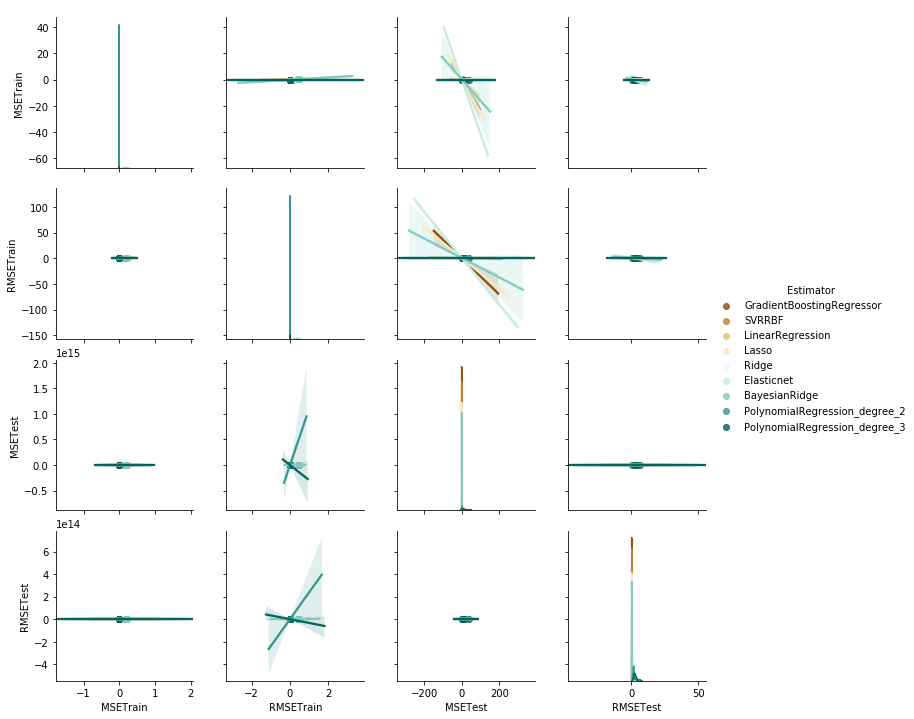

<Figure size 432x432 with 0 Axes>

In [37]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=metr_df,
             vars=["MSETrain", "RMSETrain", "MSETest", "RMSETest"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Estimator')

plt.show()
plt.clf()

In [38]:
#metr_df.rename(columns={'MSE - Train': 'MSETrain', 'RMSE - Train': 'RMSETrain', 'MSE - Test': 'MSETest', 'RMSE - Test': 'RMSETest'}, inplace=True)

In [39]:
metr_df.head(11)

,Estimator,MSETrain,RMSETrain,MSETest,RMSETest
0,GradientBoostingRegressor,1.285022e-01,3.584720e-01,0.172656,0.415519
1,SVRRBF,8.539140e-03,9.240747e-02,0.177086,0.420816
2,LinearRegression,1.072637e-01,3.275114e-01,1.022991,1.011430
3,Lasso,1.797497e-01,4.239689e-01,0.198597,0.445643
4,Ridge,1.079135e-01,3.285019e-01,0.855305,0.924827
5,Elasticnet,2.226518e-01,4.718599e-01,0.200714,0.448012
6,BayesianRidge,1.955826e-01,4.422472e-01,0.194518,0.441042
7,PolynomialRegression_degree_2,3.716780e-29,6.096540e-15,1.828133,1.352085
8,PolynomialRegression_degree_3,6.404587e-27,8.002867e-14,11.209019,3.347987
9,GradientBoostingRegressor,1.165028e-01,3.413251e-01,0.212301,0.460762


In [40]:
#metr_df.to_csv('RegressionRevOutput.csv')

In [41]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = [
        go.Bar(y=metr_df.MSETrain, x=metr_df.Estimator),
        go.Bar(y=metr_df.RMSETrain, x=metr_df.Estimator),
        go.Bar(y=metr_df.MSETest, x=metr_df.Estimator),
        go.Bar(y=metr_df.RMSETest, x=metr_df.Estimator)
]

plot_url = py.iplot(data)

In [42]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = [go.Surface(z=metr_df.Estimator.tolist(), colorscale='Viridis')]

layout = go.Layout(
    width=800,
    height=700,
    autosize=False,
    title='Restaurant Revenue dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    )
)

fig = dict(data=data, layout=layout)

# IPython notebook
# py.iplot(fig, filename='pandas-3d-surface', height=700, validate=False)

url = py.iplot(fig, filename='pandas-3d-surface')

In [103]:
def plot_and_compute_regression_metrics_RSquared(name, estimator, X_train, y_train, X_test, y_test):
    # Train model
    estimator.fit(X_train, y_train)
    
    # Compute MSE and RSME for both training and test data
    train_predictions = estimator.predict(X_train)
    training_mse = mean_squared_error(train_predictions, y_train)
    training_rmse = np.sqrt(training_mse)
        
    test_predictions = estimator.predict(X_test)
    test_mse = mean_squared_error(test_predictions, y_test)
    test_rmse = np.sqrt(test_mse)
    
    #Computing R_Squared
    rSquared = estimator.fit(X_train, y_train).score(X_test, y_test)
    
    # Plot predicted vs. actual values for both training and test data
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    ax1.set_title('{}: Training data\nRMSE: {}'.format(name, training_rmse))
    
    ax1.plot(X_train, y_train)
    ax1.scatter(y_train, train_predictions, color='green')
    ax1.set_xlabel("expected")
    ax1.set_ylabel("predicted")
    
    ax2.set_title('{}: Test data\nRMSE: {}'.format(name, test_rmse))
    ax2.plot(X_test, y_test)
    ax2.scatter(y_test, test_predictions, color='blue')
    ax2.set_xlabel("expected")
    ax2.set_ylabel("predicted")

    return training_mse, training_rmse, test_mse, test_rmse, rSquared

In [104]:
from sklearn.pipeline import Pipeline

# Ipython display facilities
from IPython.display import HTML, display
import tabulate

# 2. Instantiate sklearn estimators

# Gradient boosting
gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth=1, loss='ls')
# SVR RBF
svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
# Linear regression
linear_reg = LinearRegression()
# Lasso regression
lasso = Lasso(alpha=0.1)
# Ridge regression
ridge = Ridge(alpha=.5)
# Elasticnet regression
elasticnet = ElasticNet()
# Bayesian ridge regression
bayesian_ridge = BayesianRidge()
# Polynomial regression (degree 3)
polynomial_degree3 = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
# Polynomial regression (degree 2)
polynomial_degree2 = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression())])

estimators = {
    "GradientBoostingRegressor": gbr,
    "SVRRBF": svr_rbf,
    "LinearRegression": linear_reg,
    "Lasso": lasso,
    "Ridge": ridge,
    "Elasticnet": elasticnet,
    "BayesianRidge": bayesian_ridge,
    "PolynomialRegression_degree_2": polynomial_degree2,
    "PolynomialRegression_degree_3": polynomial_degree3
}

In [108]:
# 3. Running the model with training and testing

# External loop to perform training and test k times. 
# Measure also exec time? not easy/precise in jupyter

# several files were run with 2, 5, 10, 15, 20. Standard is 10
input_num = input ("Enter a number: ")
k = int(input_num)
print ("The number you entered is: ", k)  

# 3. Running the model with training and testing

# External loop to perform training and test k times. 
# Measure also exec time? not easy/precise in jupyter

# several files were run with 2, 5, 10, 15, 20. Standard is 10
# def header of table out of loop.
metrics = [["Estimator", "MSETrain", "RMSETrain", "MSETest", "RMSETest", "rSquared"]]

# metr_df = pd.DataFrame(columns=["Estimator", "MSE - Training", "RMSE - Training", "MSE - Test", "RMSE - Test"])  

# first element, 0, is header
for i in range(0, k):           
    
    # makes sense to avid identical results by changing seed for each repetition of the lot (take k)
    # np.random.seed(None)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.RandomState(seed=None))  # shuffled but not stratified
     
    # Train, predict and compute metrics for each estimator
    for name, estimator in estimators.items():
        
        # tuple added as a list to the table
        trn_mse, trn_rmse, tst_mse, tst_rmse, rSquared = plot_and_compute_regression_metrics_RSquared(name, estimator, X_train, y_train, X_test, y_test)
      
        metrics.append([name, trn_mse, trn_rmse, tst_mse, tst_rmse, rSquared ]) 
        
        plt.close('all') # all open figures.    


metr_df = pd.DataFrame(metrics[1:], columns=["Estimator", "MSETrain", "RMSETrain", "MSETest", "RMSETest", "rSquared"])  

  
print(i)
print(k)

Enter a number: 10
The number you entered is:  10
9
10


In [112]:
metr_df.head(10)

,Estimator,MSETrain,RMSETrain,MSETest,RMSETest,rSquared
0,GradientBoostingRegressor,9.483879e-02,3.079591e-01,0.281783,0.530833,0.080575
1,SVRRBF,8.482323e-03,9.209953e-02,0.258457,0.508386,0.156106
2,LinearRegression,1.036252e-01,3.219087e-01,0.359310,0.599425,-0.173195
3,Lasso,1.604907e-01,4.006129e-01,0.267936,0.517625,0.125154
4,Ridge,1.038780e-01,3.223011e-01,0.345152,0.587497,-0.126967
5,Elasticnet,1.860200e-01,4.313003e-01,0.295849,0.543920,0.034014
6,BayesianRidge,1.718922e-01,4.145989e-01,0.288558,0.537176,0.057820
7,PolynomialRegression_degree_2,6.639718e-29,8.148446e-15,1.138787,1.067140,-2.718287
8,PolynomialRegression_degree_3,1.128752e-27,3.359690e-14,3.459563,1.859990,-10.295921
9,GradientBoostingRegressor,1.045218e-01,3.232983e-01,0.296979,0.544958,-0.186176


In [124]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = [
        go.Bar(y=metr_df.MSETrain, x=metr_df.Estimator, name="MSETrain"),
        go.Bar(y=metr_df.RMSETrain, x=metr_df.Estimator, name="RMSETrain"),
        go.Bar(y=metr_df.MSETest, x=metr_df.Estimator, name="MSETest"),
        go.Bar(y=metr_df.RMSETest, x=metr_df.Estimator, name="RMSETest"),
        go.Bar(y=metr_df.rSquared, x=metr_df.Estimator, name="rSquared")
]

plot_url = py.iplot(data)

In [177]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

fig = {
  "data": [
    {
      "values": [9.483879e-02,8.482323e-03,1.036252e-01,1.604907e-01, 1.038780e-01, 1.860200e-01, 1.718922e-01, 6.639718e-29, 1.128752e-27],
      "labels": [
        'GradientBoostingRegressor',
        'SVRRBF',
        'LinearRegression',
        'Lasso', 
        'Ridge', 
        'ElasticNet', 
        'BayesianRidge', 
        'PolynomialRegression_degree_2', 
        'PolynomialRegression_degree_3'
      ],
      "domain": {"column": 0},
      "name": "MSETrain",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": [3.079591e-01, 9.209953e-02, 3.219087e-01, 4.006129e-01, 3.223011e-01, 4.313003e-01, 4.145989e-01, 8.148446e-15, 3.359690e-14, 3.232983e-01],
      "labels": [
        'GradientBoostingRegressor',
        'SVRRBF',
        'LinearRegression',
        'Lasso', 
        'Ridge', 
        'ElasticNet', 
        'BayesianRidge', 
        'PolynomialRegression_degree_2', 
        'PolynomialRegression_degree_3'
      ],
      #"text":["RMSETrain"],
      "textposition":"inside",
      "domain": {"column": 1},
      "name": "RMSETrain",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    } 
],
  "layout": {
        "title":"Restaurant Revenue Prediction",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "MSETrain",
                "x": 0.17,
                "y": 0.5
            },

            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "RMSETrain",
                "x": 0.85,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

In [180]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

fig = {
  "data": [
        {
      "values": [0.281783, 0.258457, 0.359310, 0.267936, 0.345152, 0.295849, 0.288558, 1.138787, 3.459563, 0.296979],
      "labels": [
        'GradientBoostingRegressor',
        'SVRRBF',
        'LinearRegression',
        'Lasso', 
        'Ridge', 
        'ElasticNet', 
        'BayesianRidge', 
        'PolynomialRegression_degree_2', 
        'PolynomialRegression_degree_3'
      ],
      #"text":["RMSETrain"],
      "textposition":"inside",
      "domain": {"column": 0},
      "name": "MSETest",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }  
],
  "layout": {
        "title":"Restaurant Revenue Prediction",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "MSETest",
                "x": 0.17,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')